In [21]:


# 보험 청구를 할 것인지 예측하는 문제
# binary classification competition

In [43]:

#metric 이해
"""

아키텍처 이해가 부족해서 시작조차 어려웠음 서빙


지니계수와
ROC


알고 한다 -> 단편적, 이분법적, 단순함이 많이 포함되어있음 정량적 지표이기는 함 영어로따지면 잘 듣고 잘 말하기는 하나
 내용 이해를 잘 못한 상태일 수 있음

이해하고 한다 -> 감정적 ,실전적, 총괄적인 앎 정량적 지표+ 정성적 지표인 느낌. 단순히 앎에
   그치는 게 아니라 이해가 있어야 실력을 늘릴 수 있다. 감정을 이해하지 못하면 돈을 못버는 것처럼



1-frac_pos / 2 가 maximum

perfect score =0.5

로렌츠 곡선 커브의 면적을 삼각형면적으로 나눈 것이 지니계수

왜 지니계수를 쓰는가?

gini = 2x AUC -1 인데
AUC는
random guessing는 0.5인데

지니계수는 random guessing이 0이다 ->?

숫자적으로 보기 편해서?

그냥 accuracy로 하면 모델을 올바르게 평가하기가 어렵다

ROC - AUC CURVE 는 threshold값을 0.1,0.2, 등등으로 정했을 때 TP RATE와 FP RATE를 PLOT 하는것
 대각선의 0.5 기울기가 1인 값이 완벽한 값이고 이와 가까운 값을 구하기 위해서 사용하는ㄱ ㅓㅅ

imbalance한 target을 가지고있을때 accuracy로 모델 성능을 평가하기 어려우므로

 얻게될 prediction 값 샘플에 대한 이 모델의 값이 0.6이면 0.5일때 class 1이라고 할때 이 샘플은 1인데
 threshold를 0.1로 둘 수도있고 0.2로 둘 수도 있고
 그러면서
 0.1,0.2,0.3 ... 하면서
 이 curve 면적의 대각선 밑의


  threshold값을 구하는 건데 thres

GINI 계수는 이와조금다르지만 비슷한 목적으로

 random guessing은 0이고 perfect guessing은


"""

'\n\n아키텍처 이해가 부족해서 시작조차 어려웠음 서빙\n\n\n지니계수와\nROC\n\n\n알고 한다 -> 단편적, 이분법적, 단순함이 많이 포함되어있음 정량적 지표이기는 함 영어로따지면 잘 듣고 잘 말하기는 하나\n 내용 이해를 잘 못한 상태일 수 있음\n\n이해하고 한다 -> 감정적 ,실전적, 총괄적인 앎 정량적 지표+ 정성적 지표인 느낌. 단순히 앎에\n   그치는 게 아니라 이해가 있어야 실력을 늘릴 수 있다. 감정을 이해하지 못하면 돈을 못버는 것처럼\n\n\n\n1-frac_pos / 2 가 maximum\n\nperfect score =0.5\n\n로렌츠 곡선 커브의 면적을 삼각형면적으로 나눈 것이 지니계수\n\n왜 지니계수를 쓰는가?\n\ngini = 2x AUC -1 인데\nAUC는\nrandom guessing는 0.5인데\n\n지니계수는 random guessing이 0이다 ->?\n\n숫자적으로 보기 편해서?\n\n그냥 accuracy로 하면 모델을 올바르게 평가하기가 어렵다\n\nROC - AUC CURVE 는 threshold값을 0.1,0.2, 등등으로 정했을 때 TP RATE와 FP RATE를 PLOT 하는것\n 대각선의 0.5 기울기가 1인 값이 완벽한 값이고 이와 가까운 값을 구하기 위해서 사용하는ㄱ ㅓㅅ\n\nimbalance한 target을 가지고있을때 accuracy로 모델 성능을 평가하기 어려우므로\n\n 얻게될 prediction 값 샘플에 대한 이 모델의 값이 0.6이면 0.5일때 class 1이라고 할때 이 샘플은 1인데\n threshold를 0.1로 둘 수도있고 0.2로 둘 수도 있고\n 그러면서\n 0.1,0.2,0.3 ... 하면서\n 이 curve 면적의 대각선 밑의\n\n\n  threshold값을 구하는 건데 thres\n\nGINI 계수는 이와조금다르지만 비슷한 목적으로\n\n random guessing은 0이고 perfect guessing은\n\n\n'

'/Users/seongminpark/PycharmProjects/pythonProject/Kaggle/PortoSeguro'

In [3]:
# Besides that , it gives some tips and tricks to prepare your data for modeling . The notebook consists of the following main sections


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 100개의 피쳐 중 특정 피쳐에서 1이 99개고 0이 1개라면  -> 그 정보에서 얻을 게 별로 없으므로 제거한다
#
from sklearn.feature_selection import VarianceThreshold
# 모델마다 중요도 어느정도 메서드로 구현된것
# 0로 했을 때 피쳐가 중요하지 않았는데
# 1로 하면 피쳐가 중요해진다면 학습을 해야한다
# 피쳐하나에 모델 한개이므로 피쳐 천개만개면 모델도 천개만개 만들어야된다
#
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier


# This notebook aims at getting a good
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# random sample 시 imbalance 가 불안하다면
from sklearn.model_selection import StratifiedKFold

In [4]:
DEBUG = True
if DEBUG:
    NROWS = 50000
else:
    NROWS = None

In [6]:
fold = StratifiedKFold(n_splits=10, random_state=1980, shuffle=True)


In [8]:
train = pd.read_csv('../PortoSeguro/porto-seguro-safe-driver-prediction/train.csv', nrows=NROWS)
test = pd.read_csv('../PortoSeguro/porto-seguro-safe-driver-prediction/test.csv',nrows=NROWS)
train = train.sample(frac=0.2)

In [9]:
"""
for trn_idx , val_idx in fold.split(train, train['target']):
    break
# 이렇게 하면 깔끔한 Stratified idx가 뽑힌다 imbalance 방지용으로
# Stratified sample이란 모집단의 하위집단이 각각 적절하게 대표되도록 하는 표본
#train = train.iloc[trn_idx]
"""

"\nfor trn_idx , val_idx in fold.split(train, train['target']):\n    break\n# 이렇게 하면 깔끔한 Stratified idx가 뽑힌다 imbalance 방지용으로\n# Stratified sample이란 모집단의 하위집단이 각각 적절하게 대표되도록 하는 표본\n#train = train.iloc[trn_idx]\n"

In [10]:
train.head()



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
22377,55962,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,3,0,0,1,0.5,0.2,0.684653,10,1,-1,0,1,1,1,1,0,1,70,3,0.424264,0.789877,0.393700,2.828427,0.9,0.8,0.3,1,2,9,3,10,5,9,6,3,2,7,0,1,1,0,0,0
17040,42741,0,1,2,2,1,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.6,0.2,0.628987,11,1,-1,0,-1,6,1,1,2,1,26,3,0.374166,0.596529,0.390768,2.828427,0.2,0.7,0.3,3,1,5,4,8,3,12,5,5,2,9,0,0,1,0,0,0
15772,39613,0,1,1,4,0,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.6,0.2,0.638357,9,1,0,8,1,11,0,1,0,1,24,2,0.529150,1.181958,-1.000000,3.162278,0.4,0.1,0.7,4,4,9,5,10,2,8,4,1,3,6,0,1,0,0,0,1
16125,40500,0,2,1,2,0,0,0,1,0,0,0,0,0,0,0,10,0,1,0,0.9,0.7,1.564449,11,0,1,8,1,13,1,0,2,1,104,3,0.447214,1.356329,0.379473,3.605551,0.0,0.4,0.7,2,1,8,5,9,3,9,7,5,3,2,0,1,0,1,0,1
12877,32400,0,4,3,4,1,6,0,0,0,1,0,0,0,0,0,12,1,0,0,0.4,0.0,0.601041,6,1,-1,0,1,11,1,1,0,1,19,1,0.315595,0.444386,0.362629,0.000000,0.5,0.1,0.2,2,1,7,3,9,1,4,5,0,3,5,0,0,0,0,0,0


In [11]:
# 20 프로 비율만 뽑기 random sample임
train.shape
# 약 59개의 feature . column count

(10000, 59)

In [12]:
#categorycal variables of which the category values are integers
# real value int ? go check
cat_cols = [col for col in train.columns if 'cat' in col]
train[cat_cols[0]].value_counts()
train[cat_cols[1]].value_counts()
train[cat_cols[2]].value_counts()

 0    8876
 6     340
 4     313
 3     155
 1     122
-1     104
 2      68
 5      22
Name: ps_ind_05_cat, dtype: int64

In [13]:
# 카테고리별로 유니크한 값이 몇개가 있는지
for col in cat_cols:
    print(col , train[col].nunique())

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [14]:
train.tail()



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
35718,89532,1,3,1,5,0,0,0,0,1,0,0,0,0,0,0,3,0,1,0,0.4,0.3,-1.000000,11,1,1,0,0,1,0,1,2,1,40,2,0.374166,0.746396,0.324808,3.162278,0.0,0.1,0.7,2,3,8,1,11,3,12,5,1,2,6,0,1,1,0,0,1
12160,30627,0,1,1,4,0,0,1,0,0,0,0,0,0,0,0,4,0,1,0,0.9,0.1,0.573367,11,0,-1,9,-1,9,1,1,1,1,104,3,0.489898,1.354919,0.500500,3.464102,0.4,0.3,0.2,2,4,9,4,9,1,12,3,0,6,11,0,1,1,0,0,0
16093,40427,0,0,2,0,1,4,0,0,0,1,0,0,0,0,0,7,1,0,0,0.8,0.6,0.874643,10,1,-1,0,1,7,1,1,0,1,92,3,0.398372,0.619834,0.392683,2.000000,0.4,0.2,0.1,2,2,9,3,8,1,9,6,2,0,10,0,0,1,1,1,0
46974,117750,0,2,1,1,1,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.5,0.2,0.987737,11,1,-1,0,-1,11,1,1,2,1,11,2,0.316228,0.674828,0.368782,3.316625,0.2,0.4,0.1,3,3,7,4,7,5,7,6,4,3,3,0,0,1,0,0,0
44343,111103,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,5,0,0,1,0.2,0.2,-1.000000,8,1,1,0,0,1,1,0,2,1,65,3,0.316228,0.758424,0.289828,3.605551,0.1,0.1,0.1,3,1,9,2,6,2,5,6,1,1,7,0,0,1,0,1,0


In [15]:
train.shape

(10000, 59)

In [16]:
# target 값이 없으므로 하나의 컬럼이 적다
test.shape
# yes it's true

(50000, 58)

In [17]:
train.drop_duplicates()
train.shape

(10000, 59)

In [18]:
# no duplicates
# binary class는 one-hot 수행하지 않는다 물론
#dummification == one hot encoding

# object is string data type
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 22377 to 44343
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   target          10000 non-null  int64  
 2   ps_ind_01       10000 non-null  int64  
 3   ps_ind_02_cat   10000 non-null  int64  
 4   ps_ind_03       10000 non-null  int64  
 5   ps_ind_04_cat   10000 non-null  int64  
 6   ps_ind_05_cat   10000 non-null  int64  
 7   ps_ind_06_bin   10000 non-null  int64  
 8   ps_ind_07_bin   10000 non-null  int64  
 9   ps_ind_08_bin   10000 non-null  int64  
 10  ps_ind_09_bin   10000 non-null  int64  
 11  ps_ind_10_bin   10000 non-null  int64  
 12  ps_ind_11_bin   10000 non-null  int64  
 13  ps_ind_12_bin   10000 non-null  int64  
 14  ps_ind_13_bin   10000 non-null  int64  
 15  ps_ind_14       10000 non-null  int64  
 16  ps_ind_15       10000 non-null  int64  
 17  ps_ind_16_bin   10000 non-n

In [19]:
# null data가 -1로 치환되어서 int or float 밖에 없다

# Concretely we will store
# role : input , ID, target
# lvel : nominal, interval , oridnal, binary
# keep True or False
#

# Metadata

# To facilitate the data management , we'll sotre meta-information about the variables in a dataframe
# this is will be helpful when we want to specific variables for analysis, visualication , modeling


data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = train[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

    # Creating a Dict that contains all the metadata for the variables



In [20]:
meta


,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [21]:
meta.level.unique()

array(['nominal', 'binary', 'ordinal', 'interval'], dtype=object)

In [22]:

meta = pd.DataFrame(data, columns = ['varname', 'role','level','keep','dtype'])

In [23]:
meta.set_index('varname',inplace=True)

In [24]:
#Example to extract all nominal variables that are not dropped
#

In [25]:
meta.loc[(meta.level=='nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [26]:
# index : role , level
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [27]:
meta.groupby(['role','level'])['role'].size()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
Name: role, dtype: int64

In [28]:
# Descriptive statistics

# we can apply the describe method on the dataframe ,however it dosen't make much sense to calculate the mean , std , on categorical variables and the id variable

# we'll explore the categorical variables vsuall later

# Thanks to our meta file we can easily select  the vaiables on which we want to compute the descriptive statistics

In [29]:
categorical_feats = [col for col in train.columns if 'cat' in col]

In [30]:
v = meta[(meta.level =='interval') & (meta.keep)].index

In [31]:
# get continous variable
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.606060,0.437200,0.537981,0.379988,0.814895,0.274624,3.069580,0.450720,0.453200,0.452850
std,0.287992,0.402234,0.796970,0.058201,0.227258,0.360167,0.729198,0.286708,0.286133,0.287719
min,0.000000,0.000000,-1.000000,0.141421,0.324634,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.520216,0.316228,0.672251,0.330908,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.716327,0.374166,0.766135,0.368782,3.316625,0.500000,0.500000,0.500000
75%,0.900000,0.600000,0.989002,0.400000,0.908975,0.397303,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,2.947457,1.264911,2.704324,0.591608,3.741657,0.900000,0.900000,0.900000


In [32]:
meta.level.unique()

array(['nominal', 'binary', 'ordinal', 'interval'], dtype=object)

In [33]:
# the range( min to max) differs between the variables ,We Could apply scaling (e.g. StandardScaler) but it dependson the
#classifier we will want to use
#  모델에 따라 다르다 scaler는 특정 variable 에 쏠림이 심할 때 등등


# car variables
# ps_car _12 and ps_car_15 have missing values

# again, the range differs and



# no miising values
# this seems to be some kind of ratio
# We can see that the range of the interval variables is rather small , perhaps some transformation is alerady
# applied in order to anonymize the data?


# a priori in the train data is 3.645% ,whici is stronly imbalance
# from the means we can colnclude that for most varialbes thv value is zero in mostcases
# Handling imbalanced classses


# As we mentioned above the proprotion of records with target= 1 is far les than target =0

# this can lead to mdoel tha thas great accuracy but does have any aded valu in practice

# 96 -> 0
# 4 -> 1

# 전부 다 0이라고 하면 96& accuracy ->  x

# 얼마나 1을 잘 맞추느냐가 더 중요하다


# 0 %


# 1인 4를 전부다 0이라고 했기 때문에 저는 0% 맞췄다. 그러면 accuracy 쓰면 안된다



# 따라서 gini or rocauc 사용


#Two possible strategies to deal with this problem are
# oversampling records with target == 1 4개의 적은 샘플을 줄여준다
# undersampling records with target ==0 96개를 적은 샘플로 줄여준다

In [34]:
desired_apriori = 0.1

In [35]:
idx_0 = train[train.target ==0 ].index
idx_1 = train[train.target ==1].index

In [36]:
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

In [37]:
undersampling_rate = ((1-desired_apriori)*nb_1) /(nb_0* desired_apriori)
# Calculate the undersampling rate and resulting number of records with target = 0
undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target =0 : {}'.format(undersampling_rate))
print('Number of records with target =0 after undersampling : {}'.format(undersampled_nb_0))
# Randomly select records with target= 0 to get at the desired a priori

undersampled_idx = shuffle(idx_0, random_state = 37 , n_samples= undersampled_nb_0)
# Construct list with remaining indices
idx_list = list(undersampled_idx) +list(idx_1)

Rate to undersample records with target =0 : 0.32352636486066505
Number of records with target =0 after undersampling : 3122


In [38]:


train = train.loc[idx_list].reset_index(drop=True)



# Data Quality Checks
# Checking missing values
# Missing are represented as -1

In [39]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,69863,0,1,1,11,0,0,0,1,0,0,0,0,0,0,0,8,0,0,1,0.8,0.8,1.450431,11,1,0,1,1,12,1,1,2,1,104,3,0.374166,0.738689,0.325576,3.464102,0.3,0.2,0.9,1,3,8,2,10,2,3,11,3,2,4,0,1,1,1,0,0
1,41766,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0.5,0.3,1.078772,11,1,-1,0,-1,0,1,1,2,1,32,3,0.316228,0.605502,0.361525,2.828427,0.8,0.9,0.7,4,3,8,3,11,0,7,3,0,5,3,0,1,0,0,0,0
2,9601,0,0,1,4,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.1,0.1,-1.000000,7,1,1,0,0,1,1,0,2,1,80,3,0.316228,0.808018,-1.000000,3.741657,0.2,0.5,0.0,1,2,6,3,11,4,5,4,1,3,8,0,1,1,0,0,0
3,34442,0,0,1,4,0,0,0,0,1,0,0,0,0,0,0,4,0,1,0,0.1,0.0,-1.000000,11,1,0,0,0,14,1,1,2,1,49,3,0.400000,0.688888,0.368511,2.828427,0.2,0.5,0.5,4,3,8,1,12,0,7,1,0,3,5,0,1,0,0,1,0
4,74925,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.8,0.3,0.457575,7,1,-1,0,-1,11,1,1,2,1,11,2,0.316228,0.667857,0.368782,3.316625,0.2,0.9,0.5,1,3,6,4,12,2,10,8,2,1,6,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,35064,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.7,0.8,0.812788,7,1,0,0,1,10,1,1,2,1,28,3,0.374166,0.829866,0.324808,3.000000,0.8,0.1,0.5,3,2,8,3,6,1,6,6,1,3,12,0,1,1,1,1,0
3465,77671,1,0,1,2,1,0,0,1,0,0,0,0,0,0,0,3,0,0,1,0.7,0.2,0.537355,6,1,-1,0,0,0,1,0,0,1,22,3,0.316228,0.838448,0.374566,3.605551,0.7,0.0,0.7,3,1,5,0,7,2,10,2,0,5,4,0,1,1,0,0,0
3466,116333,1,7,1,7,0,2,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.0,0.744564,6,1,-1,0,1,4,1,1,0,1,12,2,0.400000,0.895019,0.370810,3.464102,0.4,0.1,0.3,2,1,8,4,5,2,8,8,1,2,8,0,1,1,0,0,0
3467,32058,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0.9,1.6,1.628842,10,0,-1,0,1,1,1,1,0,1,104,3,0.424264,0.826048,0.412916,3.162278,0.1,0.3,0.8,2,1,9,2,10,2,9,5,2,2,6,0,0,1,0,1,0


In [40]:
vars_with_missing =[]

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]

        print('Variable {} has {} records ({:.2%}) with mmissing values'.format(f, missings, missings_perc))

print('In total , there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 1 records (0.03%) with mmissing values
Variable ps_ind_04_cat has 1 records (0.03%) with mmissing values
Variable ps_ind_05_cat has 42 records (1.21%) with mmissing values
Variable ps_reg_03 has 649 records (18.71%) with mmissing values
Variable ps_car_01_cat has 1 records (0.03%) with mmissing values
Variable ps_car_03_cat has 2388 records (68.84%) with mmissing values
Variable ps_car_05_cat has 1550 records (44.68%) with mmissing values
Variable ps_car_07_cat has 76 records (2.19%) with mmissing values
Variable ps_car_09_cat has 4 records (0.12%) with mmissing values
Variable ps_car_14 has 246 records (7.09%) with mmissing values
In total , there are 10 variables with missing values


In [41]:


# ps_car_03_cat and ps_car_05_car have a large proportion of records with missing values .Remove these variables.

In [42]:
# For the other categorical variables with missing values, we can leav the missing value - 1 as such

In [43]:
#ps_reg_03 (continous) has missing values for 18% of all recosrs

In [44]:
# missing value를 함부로 채우지는 않도록 하기

In [45]:
#Dropping the variables wih too many missing values
vars_to_drop = ['ps_car_03_cat' , 'ps_car_05_cat']

In [46]:
train.drop(vars_to_drop, inplace =True)

KeyError: "['ps_car_03_cat' 'ps_car_05_cat'] not found in axis"

In [47]:
meta.index

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [48]:
meta.loc[(vars_to_drop), 'keep'] =False

In [49]:
temp_series =train[['ps_car_01_cat', 'ps_car_02_cat','ps_reg_03']].groupby(['ps_car_01_cat','ps_car_02_cat']).mean()

In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
pd.set_option('display.max_columns',100)

In [52]:
mean_imp = SimpleImputer(missing_values=-1,strategy='mean')

In [53]:
mode_imp = SimpleImputer(missing_values=-1,strategy='most_frequent')

In [54]:
# 평균값이나 mode로 씌운다

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()
#temp_series.reset_index(inplace=True )

In [55]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index



In [56]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 8 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [57]:
#Checking the cardinality of the categoricla variables



In [58]:
#train.loc[train['ps_reg_03'] == -1].merge(temp_series, on = ['ps_car_01_cat','ps_car_02_cat'],how='#left')

In [59]:

#Cardinality refers to the number of diffrent values in a variable
# As we will create dummy variables from categorical variables later on ,
# We need to check wheter there are variables with many distinct values


# cardinality is distinct value count



v = meta[(meta.level =='nominal') & (meta.keep)].index

In [60]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 8 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [61]:
# frequency encoding-> (example : 5/9 , 4/9  ) or mean encoding -> (target값에 대한 평균을취함 확률값을 취하는 것처럼 값이 됨 )사용#

# 이거 하나하나다 엄청나고중요한거야 시간을 투자했잖아 우선 그 시간만큼을 버리는 게아니라 항상 배울게있다
# cardinality ( -> most frequeny data 로 채워준다 imputer 사용하면 좋다
# imbalance data -> over sampling under sampling 등의 기법 사용




In [62]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

In [63]:
def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):

    # category 컬럼이름으로 left join 하고 null값을 평균값을 채워서 타겟값을 encoding한다
    # encoding 과정에서 평균값과 평균값별 count를 계산하였고
    # smoothing 을 적용하고 빈 값을 평균값으로 채우는 함수


    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing

    # 카테고리별 평균값과 통계치를 구한다
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # target 컬럼에 평균값을 적용한다 smoothing 값과 이렇게함으로써
    # null 값을 smoothing값으로 채우는 것
    # 고유값이 많은지 확인하는 것 많은 더미 변수를 생성하므로 이러한 변수를 나중에 다르게 처리해야하므로
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series

    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it

    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    # add_noise 하여 continous 하게 만드는 것
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

NameError: name 'ft_trn_series' is not defined

In [ ]:
trn_series = train['ps_car_11_cat']
tst_series = test['ps_car_11_cat']
target = train.target
min_sample_leaf = 100
smoothing = 10
noise_level = 0.01


In [79]:
# series 의 column 이 name 이 된다
assert len(trn_series) == len(target)
assert trn_series.name == tst_series.name
temp = pd.concat([trn_series, target] , axis=1)


In [66]:
def max_min(x):
    return x.max() - x.min()
# category 가 많을 때 중요 카테고리를 가지고 groupby 하여 여러 가지 통계값을 가지고 feature를 만든다 많이 하는 것 .

temp.groupby(by=trn_series.name)[target.name].agg(['mean','count',max_min])

,mean,count,max_min
ps_car_11_cat,,,
1,0.173913,23,1
2,0.263158,19,1
3,0.062500,16,1
4,0.100000,10,1
5,0.111111,63,1
...,...,...,...
100,0.156250,32,1
101,0.100000,40,1
102,0.136364,22,1


,mean,count
ps_car_11_cat,,
1,0.173913,23
2,0.263158,19
3,0.062500,16
4,0.100000,10
5,0.111111,63
...,...,...
100,0.156250,32
101,0.100000,40
102,0.136364,22


In [86]:
averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])


In [92]:
averages.reset_index()

,ps_car_11_cat,mean,count
0,1,0.173913,23
1,2,0.263158,19
2,3,0.062500,16
3,4,0.100000,10
4,5,0.111111,63
...,...,...,...
99,100,0.156250,32
100,101,0.100000,40
101,102,0.136364,22
102,103,0.080000,150


In [93]:
tst_series.to_frame(tst_series.name)

,ps_car_11_cat
0,65
1,103
2,29
3,40
4,101
...,...
49995,104
49996,12
49997,104
49998,32


In [69]:
smoothing = 1 / (1 + np.exp(-(averages['count'] - min_sample_leaf) / smoothing))

In [111]:
averages

,mean,count
ps_car_11_cat,,
1,0.173913,23
2,0.263158,19
3,0.062500,16
4,0.100000,10
5,0.111111,63
...,...,...
100,0.156250,32
101,0.100000,40
102,0.136364,22


In [ ]:
averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing

In [72]:
averages

,mean,count,target
ps_car_11_cat,,,
1,0.173913,23,0.100062
2,0.263158,19,0.100078
3,0.062500,16,0.100020
4,0.100000,10,0.100029
5,0.111111,63,0.100296
...,...,...,...
100,0.156250,32,0.100091
101,0.100000,40,0.100029
102,0.136364,22,0.100044


In [76]:
averages.drop(['mean','count'],axis=1,inplace=True)

pd.merge(trn_series.to_frame(trn_series.name),
         averages.reset_index().rename(columns={'index' : target.name, target.name: 'average'
       })      , on = trn_series.name, how= 'left')['average'].rename(trn_series.name +'_mean').fillna(prior)

KeyError: "['mean' 'count'] not found in axis"

NameError: name 'ft_trn_series' is not defined

In [ ]:
# pd.merge does not keep the index so restore it


ft_tst_series =pd.merge(tst_series.to_frame(tst_series.name)  ,
                        averages.reset_index().rename(columns={'index' : target.name , target.name : 'average'}),
                        on = tst_series.name,
                        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
                        #pd.merge does not keep the index so restore it
ft_tst_series.index = tst_series.index
return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)


In [ ]:
trn_series

In [ ]:
#%5
trn_series.to_frame(trn_series.name), averages.reset_index()

In [113]:

train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                             test["ps_car_11_cat"],
                             target=train.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [114]:
train['ps_car_11_cat_te'] = train_encoded

In [115]:
train.drop('ps_car_11_cat', axis=1, inplace=True)

In [116]:
meta.loc['ps_car_c11_cat', 'keep']= False

In [117]:
test['ps_car_11_cat_te'] = test_encoded

In [118]:
test.drop('ps_car_11_cat', axis=1 , inplace=True)

In [120]:
#Exploratory Data Visualization

# Categorical variables
#

v= meta[(meta.level== 'nominal') &(meta.keep)].index

In [121]:
for f in v:
    break

AttributeError: 'DataFrame' object has no attribute 'sort_valeus'

<Figure size 432x288 with 0 Axes>

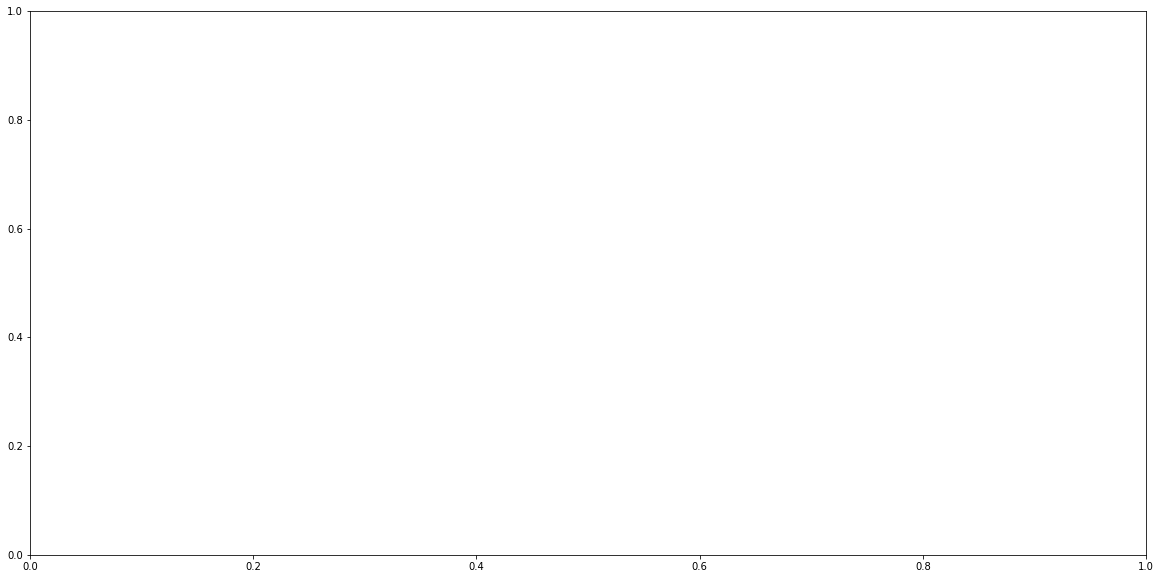

In [124]:
sns.set(font_scale=2)

<Figure size 432x288 with 0 Axes>

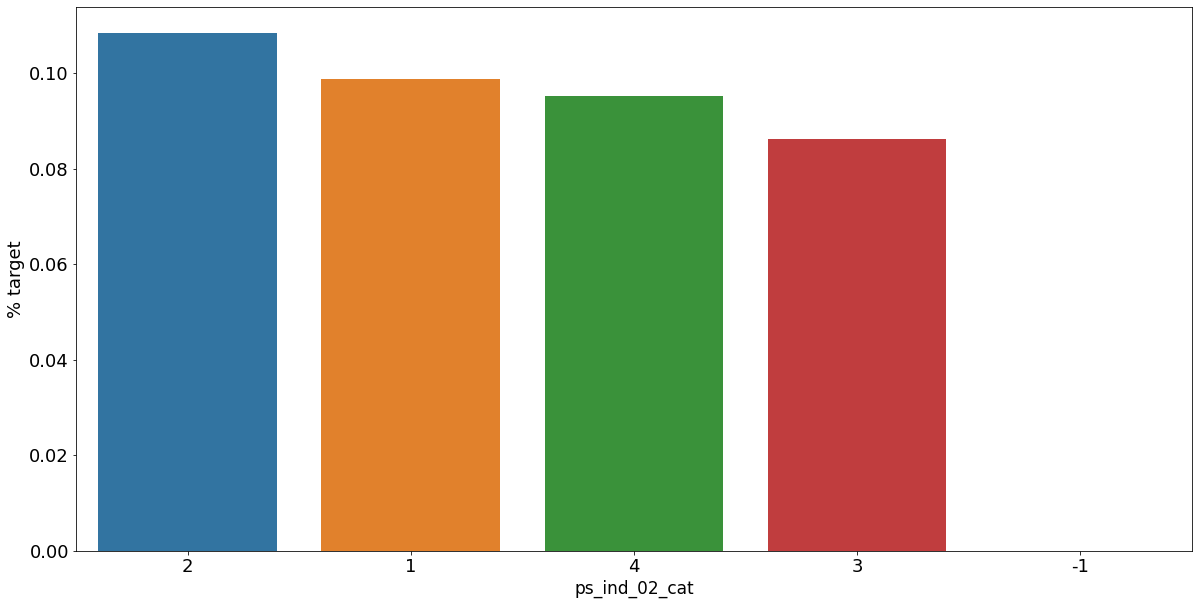

In [122]:
cat_perc

,ps_car_11_cat,target
19,20,0.500000
60,61,0.473684
34,35,0.285714
62,63,0.285714
55,56,0.272727
...,...,...
65,66,0.000000
68,69,0.000000
23,24,0.000000
72,73,0.000000


In [120]:
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
# 보험청구를 하지 않는다는것
sns.set(font_scale=2)
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    # index로는 하지 않겠다

    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean().agg(['mean','count'])
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    # fontsize를 고정 시키면 캔버스가 작아질수 있다
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [123]:
f = ps_ind_04_cat

NameError: name 'trian' is not defined

In [ ]:
cat_perc = trian[[f,'target']].groupby([f],as_index=False)

In [ ]:
# 확률 확인할때는 count 확인할 것

# eda 귀찮아서 참고하는 경우 많아서 커널 메달 받기 좋다


In [ ]:
# As we can see from the variables with missing values, it is a good idesa to keep
#the missing values as a seperate . instead of replacing htem by the mod for instance



In [ ]:
# the cusomers with a missning values appear to have a much higher ( in some cases much lower)
#probability to ask for an insurace claim


# Interval variables

# Checking the correlation between interval variables. A heatmap is a good way to visualzize the correlation betweeen variables . The code below is based on an example buy Mi

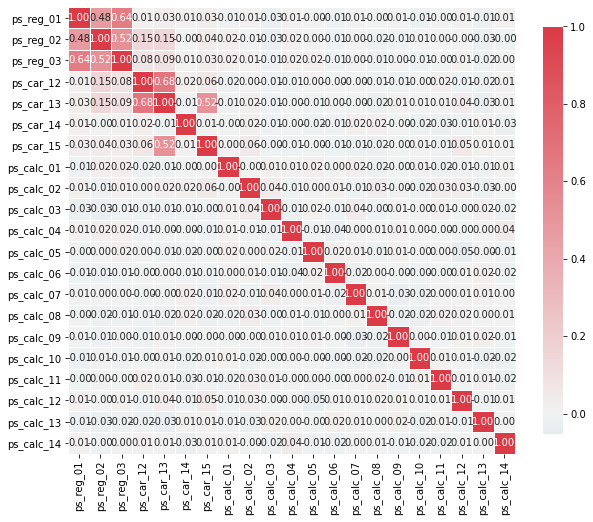

In [129]:
# fork 할떄 출처남기기
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
# squere 는 정사각형 annot 각 셀에 값표기유무
    # cbar_kws value mapping color bar shrink 옵션은 컬러바 크기 조절 vmax는 컬러바의 최대크기

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)


In [ ]:
# corr 시각화할때 heatmap 표현해주는것도  좋겠다


#correlations = train[v].corr()

#Create color map ranging between two colors
# select palette
#cmap =  sns.diverging_palette(220, 10 , as_cmap=True)


#fig , ax =  plt.subplots(figsize=(10,10 ))
# vmax 최대값 cneter  중앙값   , fmt 소수점
#sns.heatmap(correlations, cmap = cmap, vmax=1.0 , center =0, fmt='.2f'. square = True,linewidths=5)



In [ ]:
f = 'ps_car_02_cat '

In [124]:
# Feature Engineering

# Creating dummy variables

# The values of the categorical variables do not represent any order of magnitude

"""
For instance , category 2 is not twice the value of category 1 . Therefore we can create dummy variables
to deal with that . We Drop the first dummy variable as this
 inforamtion can be derived from the other dummy variables generated for the categories of the
 original variable

"""

v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [ ]:
train.shape[1]

In [ ]:
#n -1 개로 원핫인코딩하는것이 get_dummies 이다
train.pd.get_dummies(trian, columns=v , drop_first =True)


In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index


In [ ]:
""""
캐글은 점수를 높이기만 하면 된다
a라는 category feature 를 one-hot encoding , frequency encoding , mean encoding 얻은 결과
하나씩 해서 합치면 하나만 하는 것보다 결과가좋을 수 있다 -> score를 쥐어짜낼 때
"""

In [126]:
"""
interaction_only 가 True 일 때는 자기 자신의 제곱은 없다 self interaction 은 제외한다는 말
include_bias false는 include하고 남는 bias 뺀다
"""
# polynomialFeature 는 interaction 해주는 함수, feature 를 생성해준다
# 주어진 차수를 가진 feature 의 모든 다항식 조합으로 새 행렬을 생성한다 자기 자신 제곱 혹은 모든 조합에 대해서 Feature 를 구한다

train[v]

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,1,0,0,11,1,1,12,1,1,2,1,104
1,1,1,0,11,1,0,0,1,1,2,1,32
2,1,0,0,7,1,0,1,1,0,2,1,80
3,1,0,0,11,1,0,14,1,1,2,1,49
4,1,0,0,7,1,0,11,1,1,2,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3464,2,1,0,7,1,0,10,1,1,2,1,28
3465,1,1,0,6,1,0,0,1,0,0,1,22
3466,1,0,2,6,1,0,4,1,1,0,1,12
3467,1,1,0,10,0,0,1,1,1,0,1,104


In [127]:
poly = PolynomialFeatures(degree=2 , interaction_only=False ,include_bias=False)

# feature 와 feature 조합을 만들어 계산한 값을 만들어 준다 poly가
interactions = pd.DataFrame(data=poly.fit_transform(train[v]) , columns=poly.get_feature_names(v))

In [129]:
interactions.drop(v, axis=1, inplace=True)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,69863,0,1,1,11,0,0,0,1,0,0,0,0,0,0,0,8,0,0,1,0.8,0.8,1.450431,11,1,0,1,1,12,1,1,2,1,104,3,0.374166,0.738689,0.325576,3.464102,0.3,0.2,0.9,1,3,8,2,10,2,3,11,3,2,4,0,1,1,1,0,0
1,41766,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0.5,0.3,1.078772,11,1,-1,0,-1,0,1,1,2,1,32,3,0.316228,0.605502,0.361525,2.828427,0.8,0.9,0.7,4,3,8,3,11,0,7,3,0,5,3,0,1,0,0,0,0
2,9601,0,0,1,4,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.1,0.1,0.895381,7,1,1,0,0,1,1,0,2,1,80,3,0.316228,0.808018,0.375170,3.741657,0.2,0.5,0.0,1,2,6,3,11,4,5,4,1,3,8,0,1,1,0,0,0
3,34442,0,0,1,4,0,0,0,0,1,0,0,0,0,0,0,4,0,1,0,0.1,0.0,0.895381,11,1,0,0,0,14,1,1,2,1,49,3,0.400000,0.688888,0.368511,2.828427,0.2,0.5,0.5,4,3,8,1,12,0,7,1,0,3,5,0,1,0,0,1,0
4,74925,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.8,0.3,0.457575,7,1,-1,0,-1,11,1,1,2,1,11,2,0.316228,0.667857,0.368782,3.316625,0.2,0.9,0.5,1,3,6,4,12,2,10,8,2,1,6,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,35064,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.7,0.8,0.812788,7,1,0,0,1,10,1,1,2,1,28,3,0.374166,0.829866,0.324808,3.000000,0.8,0.1,0.5,3,2,8,3,6,1,6,6,1,3,12,0,1,1,1,1,0
3465,77671,1,0,1,2,1,0,0,1,0,0,0,0,0,0,0,3,0,0,1,0.7,0.2,0.537355,6,1,-1,0,0,0,1,0,0,1,22,3,0.316228,0.838448,0.374566,3.605551,0.7,0.0,0.7,3,1,5,0,7,2,10,2,0,5,4,0,1,1,0,0,0
3466,116333,1,7,1,7,0,2,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.0,0.744564,6,1,-1,0,1,4,1,1,0,1,12,2,0.400000,0.895019,0.370810,3.464102,0.4,0.1,0.3,2,1,8,4,5,2,8,8,1,2,8,0,1,1,0,0,0
3467,32058,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0.9,1.6,1.628842,10,0,-1,0,1,1,1,1,0,1,104,3,0.424264,0.826048,0.412916,3.162278,0.1,0.3,0.8,2,1,9,2,10,2,9,5,2,2,6,0,0,1,0,1,0


In [131]:
train.shape

(3469, 59)

In [132]:
train = pd.concat([train, interactions] ,axis=1)

In [133]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,...,ps_ind_05_cat ps_car_07_cat,ps_ind_05_cat ps_car_08_cat,ps_ind_05_cat ps_car_09_cat,ps_ind_05_cat ps_car_10_cat,ps_ind_05_cat ps_car_11_cat,ps_car_01_cat^2,ps_car_01_cat ps_car_02_cat,ps_car_01_cat ps_car_04_cat,ps_car_01_cat ps_car_06_cat,ps_car_01_cat ps_car_07_cat,ps_car_01_cat ps_car_08_cat,ps_car_01_cat ps_car_09_cat,ps_car_01_cat ps_car_10_cat,ps_car_01_cat ps_car_11_cat,ps_car_02_cat^2,ps_car_02_cat ps_car_04_cat,ps_car_02_cat ps_car_06_cat,ps_car_02_cat ps_car_07_cat,ps_car_02_cat ps_car_08_cat,ps_car_02_cat ps_car_09_cat,ps_car_02_cat ps_car_10_cat,ps_car_02_cat ps_car_11_cat,ps_car_04_cat^2,ps_car_04_cat ps_car_06_cat,ps_car_04_cat ps_car_07_cat,ps_car_04_cat ps_car_08_cat,ps_car_04_cat ps_car_09_cat,ps_car_04_cat ps_car_10_cat,ps_car_04_cat ps_car_11_cat,ps_car_06_cat^2,ps_car_06_cat ps_car_07_cat,ps_car_06_cat ps_car_08_cat,ps_car_06_cat ps_car_09_cat,ps_car_06_cat ps_car_10_cat,ps_car_06_cat ps_car_11_cat,ps_car_07_cat^2,ps_car_07_cat ps_car_08_cat,ps_car_07_cat ps_car_09_cat,ps_car_07_cat ps_car_10_cat,ps_car_07_cat ps_car_11_cat,ps_car_08_cat^2,ps_car_08_cat ps_car_09_cat,ps_car_08_cat ps_car_10_cat,ps_car_08_cat ps_car_11_cat,ps_car_09_cat^2,ps_car_09_cat ps_car_10_cat,ps_car_09_cat ps_car_11_cat,ps_car_10_cat^2,ps_car_10_cat ps_car_11_cat,ps_car_11_cat^2
0,69863,0,1,1,11,0,0,0,1,0,0,0,0,0,0,0,8,0,0,1,0.8,0.8,1.450431,11,1,0,1,1,12,1,1,2,1,104,3,0.374166,0.738689,0.325576,3.464102,0.3,0.2,0.9,1,3,8,2,10,2,3,11,...,0.0,0.0,0.0,0.0,0.0,121.0,11.0,11.0,132.0,11.0,11.0,22.0,11.0,1144.0,1.0,1.0,12.0,1.0,1.0,2.0,1.0,104.0,1.0,12.0,1.0,1.0,2.0,1.0,104.0,144.0,12.0,12.0,24.0,12.0,1248.0,1.0,1.0,2.0,1.0,104.0,1.0,2.0,1.0,104.0,4.0,2.0,208.0,1.0,104.0,10816.0
1,41766,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0.5,0.3,1.078772,11,1,-1,0,-1,0,1,1,2,1,32,3,0.316228,0.605502,0.361525,2.828427,0.8,0.9,0.7,4,3,8,3,11,0,7,3,...,0.0,0.0,0.0,0.0,0.0,121.0,11.0,0.0,0.0,11.0,11.0,22.0,11.0,352.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,32.0,1.0,2.0,1.0,32.0,4.0,2.0,64.0,1.0,32.0,1024.0
2,9601,0,0,1,4,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.1,0.1,0.895381,7,1,1,0,0,1,1,0,2,1,80,3,0.316228,0.808018,0.375170,3.741657,0.2,0.5,0.0,1,2,6,3,11,4,5,4,...,0.0,0.0,0.0,0.0,0.0,49.0,7.0,0.0,7.0,7.0,0.0,14.0,7.0,560.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,80.0,1.0,0.0,2.0,1.0,80.0,0.0,0.0,0.0,0.0,4.0,2.0,160.0,1.0,80.0,6400.0
3,34442,0,0,1,4,0,0,0,0,1,0,0,0,0,0,0,4,0,1,0,0.1,0.0,0.895381,11,1,0,0,0,14,1,1,2,1,49,3,0.400000,0.688888,0.368511,2.828427,0.2,0.5,0.5,4,3,8,1,12,0,7,1,...,0.0,0.0,0.0,0.0,0.0,121.0,11.0,0.0,154.0,11.0,11.0,22.0,11.0,539.0,1.0,0.0,14.0,1.0,1.0,2.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,14.0,14.0,28.0,14.0,686.0,1.0,1.0,2.0,1.0,49.0,1.0,2.0,1.0,49.0,4.0,2.0,98.0,1.0,49.0,2401.0
4,74925,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.8,0.3,0.457575,7,1,-1,0,-1,11,1,1,2,1,11,2,0.316228,0.667857,0.368782,3.316625,0.2,0.9,0.5,1,3,6,4,12,2,10,8,...,0.0,0.0,0.0,0.0,0.0,49.0,7.0,0.0,77.0,7.0,7.0,14.0,7.0,77.0,1.0,0.0,11.0,1.0,1.0,2.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,11.0,11.0,22.0,11.0,121.0,1.0,1.0,2.0,1.0,11.0,1.0,2.0,1.0,11.0,4.0,2.0,22.0,1.0,11.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [138]:
# Feature Selection
# Removing features with low or zero variance

# Personllay , i prefer to let the classifier algorithm chose which features to keep
# But there is on thing that we can do ourseleves
# That is removing features with no or a very low variance
# Sklearn ahs a handy method to do that  : Variance Threshold

# By default it removes feature with zero variance
# This will not be applicable for this competition
# as we saw there are no zero variance variables in the previous steps
# But if we would remove features with less than 1% variance, we would remove 31 variables


# 분산 값이 0.01 보다 낮은 값을 찾는다 zero value는 없지만
# feature 자체가 표본에 따라 그다지 변하지 않든다면
# 예를 들면 종속데이터와 특징데이터가 모두 0 또는 1 두가지값을 가지는데 종속데이터는 0과1균형인데 특징데이터가 대부분이 0이라면
# 분류에 도움이 되지 안흥ㄹ 가능성이 높기 때문 ,
# 분산에 의한 선택은 반드시 상관관계와 일치한다는 보장은 없기 때문에 신중하게 사용해야한다
selector = VarianceThreshold(threshold=0.01)

In [139]:
selector.fit(train.drop(['id','target'], axis=1))

# Fit to train without id and target variables

f = np.vectorize(lambda x : not x)


v = train.drop(['id','target'], axis=1).columns[f(selector.get_support())]

In [140]:
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

8 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14', 'ps_car_10_cat']


In [ ]:
# feature 1000개 이상이면 몇십개씩 block으로 성능향상 비교 하고 feture importance 상위 10%에새로추가된거 생기고
# 안생기면 다른 것 randomly choosing 을 계속 해보는 방식으로 늘려야하낟
# 아래 Randomforestclassifier 가 그런 역할을한다
# 특정 특성을 선택하는 트리를 여러 개 생성하여  이들을 기반으로 작업
# n_estimators 모델에서 사용하는 트리개수
# random_state 난수 seed 설정?
# n_jobs= 적합성과 예측성을 위해 병렬로 실행할 작업 수

In [143]:


X_train = train.drop(['id','target'], axis=1)
y_train = train['target']

In [144]:
feat_labels = X_train.columns

In [145]:
#
rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1 )

rf.fit(X_train[:1000], y_train[:1000])

importances = rf.feature_importances_
# 내림차순 indices 를 반환 하는 argsort
indices  = np.argsort(rf.feature_importances_)[::-1]

In [147]:
# 너무 작게하면 Feature importance 가 나오지않는다

rf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]) )



In [148]:
# With select from model , we can specify which prefit classifer to sue and what
# the threshold is for the feature importance

# prefit True 이면 이미 학습한 모델을 넘긴다
# median 값 이상인 모델을 가져온다
sfm = SelectFromModel(rf, threshold='median', prefit=True)

print('Numver of features before selection : {}'.format(X_train.shape[1]))

Numver of features before selection : 147


In [150]:
n_features = sfm.transform(X_train).shape[1]

In [151]:
print("Number of features after selection : {}".format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])

Number of features after selection : 147


In [152]:
# sklearn 은 기본적으로 gpu 를 지원하지 않는다
train = train[selected_vars + ['target']]

In [153]:
train.shape

(3469, 172)

In [ ]:
# xgboost library 는 gpu 지원이 되지만 sklearn 은 되지않는다

In [ ]:
#As mentioned before , we can apply standard scaling to the trainning data
# Some classifiers perform beter when this is done

In [156]:
scaler = StandardScaler()



scaler.fit_transform(train.drop(['target'] ,axis=1))

array([[-0.42751364, -0.55061171, -0.55061171, ...,  0.06074908,
         1.24899736,  1.45755173],
       [-0.93540571, -0.55061171, -0.55061171, ...,  0.06074908,
        -0.90544933, -1.01415365],
       [-0.93540571, -0.55061171, -0.55061171, ...,  0.06074908,
         0.53084846,  0.34286106],
       ...,
       [ 2.61983875, -0.55061171, -0.55061171, ...,  0.06074908,
        -1.50390675, -1.23628404],
       [-0.42751364, -0.55061171, -0.55061171, ...,  0.06074908,
         1.24899736,  1.45755173],
       [ 0.58827049, -0.55061171, -0.55061171, ...,  0.06074908,
        -0.66606637, -0.86875922]])

In [159]:
# 각 feature들의 평균
scaler.mean_

array([ 1.84174114e+00,  1.36004612e+00,  1.36004612e+00,  4.37532430e+00,
        4.31824733e-01,  4.31824733e-01,  4.25194581e-01,  4.25194581e-01,
        3.92043817e-01,  2.53675411e-01,  1.72095705e-01,  1.82185068e-01,
        2.88267512e-04,  1.44133756e-03,  7.49495532e-03,  2.88267512e-04,
        9.51282790e-03,  7.26578265e+00,  6.56961660e-01,  1.28855578e-01,
        1.56817527e-01,  6.11184779e-01,  4.45200346e-01,  8.95380970e-01,
        8.38051312e+00,  8.38051312e+00,  8.23580283e-01,  8.23580283e-01,
       -4.96973191e-01,  7.53819545e-01,  7.53819545e-01, -1.64600749e-01,
        6.66964543e+00,  6.66964543e+00,  9.06601326e-01,  9.06601326e-01,
        8.30498703e-01,  8.30498703e-01,  1.33842606e+00,  1.33842606e+00,
        9.91640242e-01,  9.91640242e-01,  6.28619199e+01,  6.28619199e+01,
        2.31363505e+00,  3.80384380e-01,  8.18756092e-01,  3.75169566e-01,
        3.08838689e+00,  4.48803690e-01,  4.51916979e-01,  4.55376189e-01,
        2.37820698e+00,  

In [160]:
# scaler 가  mean과 variance 값등을 학습하여 가지고 있고 이 값을 test data 등에 적용하여
# scaling한다
# 평균이 0이고 붑ㄴ산을 1로 조정
# 0~15 인 값을 0~1로 조정하는 과정 정규화라고 보면된다
# 데이터셋 값이 들쑥날쑥 하거나 매우 큰경우에 cost값이 발산하여 학습이 잘 이루어지지 않기 때문에 사용한다

scaler.var_

array([3.87665491e+00, 4.27587891e-01, 4.27587891e-01, 7.22840235e+00,
       2.45928668e-01, 2.45928668e-01, 1.89156471e+00, 1.89156471e+00,
       2.38345462e-01, 1.89324197e-01, 1.42478773e-01, 1.48993669e-01,
       2.88184414e-04, 1.43926011e-03, 7.43878096e-03, 2.88184414e-04,
       1.23050091e-02, 1.24672668e+01, 2.25363037e-01, 1.12251818e-01,
       1.32225790e-01, 8.36569705e-02, 1.65826632e-01, 9.24633630e-02,
       6.34987682e+00, 6.34987682e+00, 1.45295801e-01, 1.45295801e-01,
       6.32810095e-01, 4.78574860e+00, 4.78574860e+00, 7.01935132e-01,
       2.99514020e+01, 2.99514020e+01, 1.28492024e-01, 1.28492024e-01,
       1.40770607e-01, 1.40770607e-01, 9.42833037e-01, 9.42833037e-01,
       9.44294235e-03, 9.44294235e-03, 1.09008788e+03, 1.09008788e+03,
       7.15123973e-01, 3.34871497e-03, 5.21057296e-02, 1.96164604e-03,
       5.10871878e-01, 8.20488715e-02, 8.32169940e-02, 8.24768619e-02,
       1.25678652e+00, 1.31035625e+00, 1.77968567e+00, 2.02051295e+00,
      

In [161]:
# 위의 feature 모두 적용하지않아서 그렇다
scaler.transform(test)

ValueError: X has 58 features, but StandardScaler is expecting 171 features as input.

In [ ]:
# 아주 중요한것

# take home message

# scaling - train 먼저 fitting 시키고
# 그 다음에 test transform

#1.

# train 한 것을 test 에 적용하는 것이다

scaler = StandardScaler( )


df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)


In [ ]:
#2.
scaler = StandardScaler()

df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)